# Results 

In [1]:
import numpy as np
import dill
from Optimizer_Scripts.functions import ackley_gen, rastrigin_gen, ackley_deriv_gen, rast_deriv_gen
from Optimizer_Scripts.optimizers import Adam, Momentum, NesterovMomentum
from Optimizer_Scripts.Delayer import Delayer
import os
import re
import matplotlib.pyplot as plt

In [2]:
maxiter=5000
tol=1e-5

In [3]:
del_dir = '../results/delays'
un_dir = '../results/undelays'
rast_del_sym = list()
ack_del_sym = list()
rast_del_unsym = list()
ack_del_unsym = list()
rast_undel = list()
ack_undel = list()

In [4]:
#get the undelayed tests
for filename in os.listdir(del_dir):
    delay_object = dill.load( open(del_dir+"/"+filename, "rb" ) ) 
    if re.match(r"^test_.*_Rastrigin", filename):
        rast_del_sym.append(delay_object)
    elif re.match(r"^test_.*_Ackley", filename):
        ack_del_sym.append(delay_object)
    elif re.match(r"^nonsym_test_.*_Rastrigin", filename):
        rast_del_unsym.append(delay_object)
    elif re.match(r"^nonsym_test_.*_Ackley", filename):
        ack_del_unsym.append(delay_object)
    else:
        print("file did not match")
        print(filename)
#get the undelayed tests        
for filename in os.listdir(un_dir):
    delay_object = dill.load( open(un_dir+"/"+filename, "rb" ) )
    if re.match(r"^test_.*_Ackley", filename):
        rast_undel.append(delay_object)
    elif re.match(r"^test_.*_Rastrigin", filename):
        ack_undel.append(delay_object)
    else:
        print("file did not match") 
        print(filename)

file did not match
tests_Adam_100_Ackley.pkl
file did not match
tests_Adam_100_Rastrigin.pkl
file did not match
tests_Adam_100_Ackley.pkl
file did not match
tests_Adam_100_Rastrigin.pkl


## The tests for all three hyperparameters

### The delayed symmetric ackley tests

{'beta_1': 0.9999467648062612, 'beta_2': 0.9073048928554825, 'learning_rate': 0.8149868488075063}


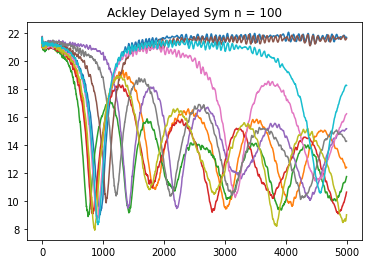

{'beta_1': 0.999771673857769, 'beta_2': 0.959585005770835, 'learning_rate': 1.2237755996225368}


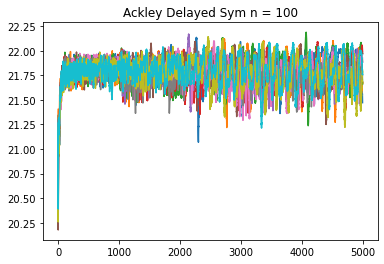

{'beta_1': 0.8912416462692324, 'beta_2': 0.8735926357310172, 'learning_rate': 0.9080157588577502}


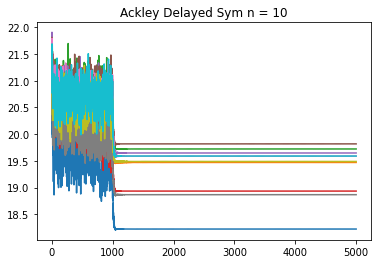

In [5]:
for i in ack_del_sym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-32.,32.,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals)
    plt.title("Ackley Delayed Sym n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()            

### The delayed nonsymmetric ackley tests

{'beta_1': 0.8734440250776297, 'beta_2': 0.9593328537185867, 'learning_rate': 0.7789299857461234}


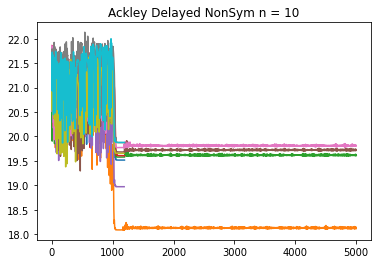

{'beta_1': 0.8914623600540073, 'beta_2': 0.8982909124717192, 'learning_rate': 1.0991477318277696}


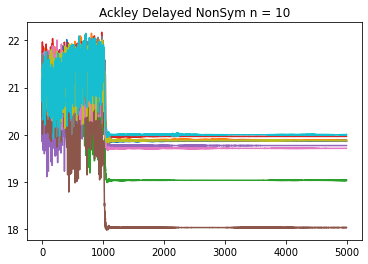

In [6]:
for i in ack_del_unsym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-32.,32.,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=False, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals)
    plt.title("Ackley Delayed NonSym n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()        

### The undelayed ackley tests

{'beta_1': 0.9069774077151224, 'beta_2': 0.8239904341457863, 'learning_rate': 0.41526729525024214}


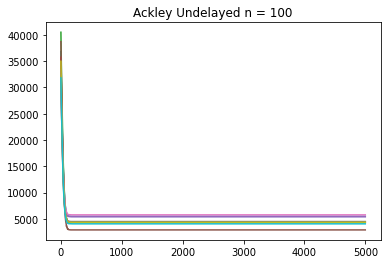

{'beta_1': 0.8052358134148352, 'beta_2': 0.9431351398934559, 'learning_rate': 0.8837305923413414}


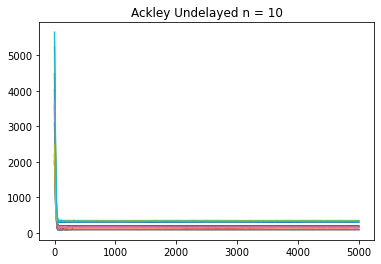

{'beta_1': 0.9380124441001519, 'beta_2': 0.9888739210426045, 'learning_rate': 0.13814564067576035}


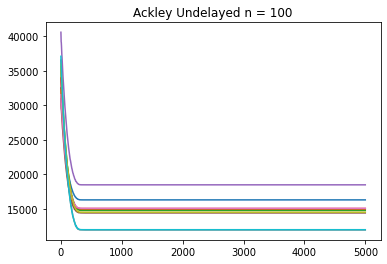

{'beta_1': 0.9736850745141635, 'beta_2': 0.8193554411876821, 'learning_rate': 0.6524631017075724}


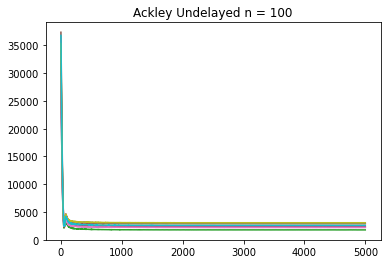

{'beta_1': 0.9343151785148943, 'beta_2': 0.8077907885174674, 'learning_rate': 0.7162875774731408}


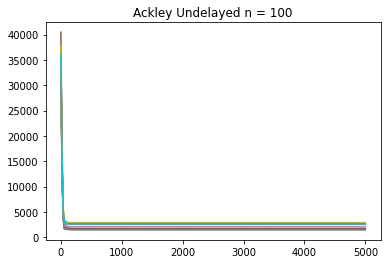

{'beta_1': 0.8009808540847868, 'beta_2': 0.9997452784298171, 'learning_rate': 0.37733144637586397}


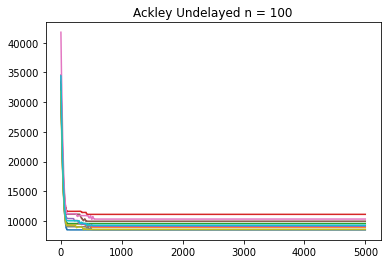

{'beta_1': 0.9942556496915426, 'beta_2': 0.9756062096641988, 'learning_rate': 1.4668389125131216}


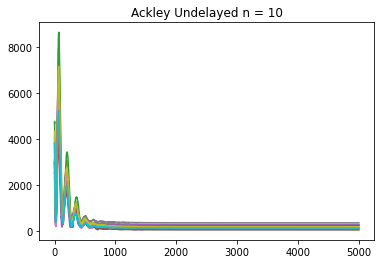

In [11]:
for i in ack_undel:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-32.,32.,i.n)
        i.compute_time_series(use_delays=False, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals)
    plt.title("Ackley Undelayed n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()

### The delayed symmetric rastrigin tests

{'beta_1': 0.9428898904429064, 'beta_2': 0.9990203026303265, 'learning_rate': 1.2204252811023637}


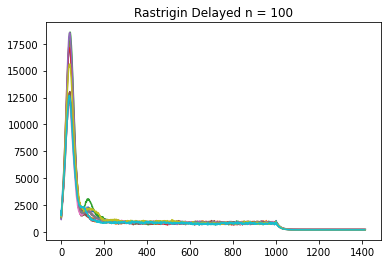

{'beta_1': 0.982953771891439, 'beta_2': 0.9658645498647427, 'learning_rate': 1.1439461038605454}


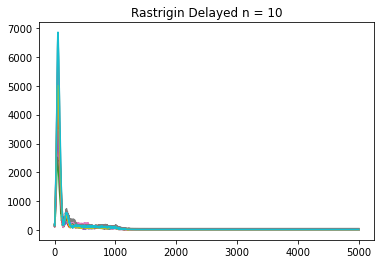

{'beta_1': 0.9498474967549111, 'beta_2': 0.9942654990996465, 'learning_rate': 0.8375092357888649}


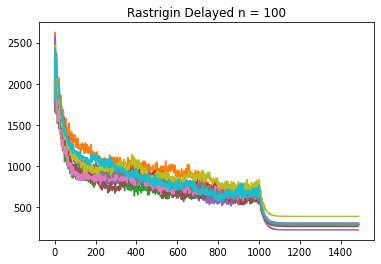

{'beta_1': 0.886789435787596, 'beta_2': 0.9826891375211775, 'learning_rate': 0.9452149651399628}


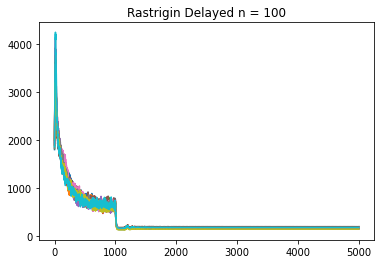

{'beta_1': 0.8032060995892406, 'beta_2': 0.9200224486166888, 'learning_rate': 1.073226186506793}


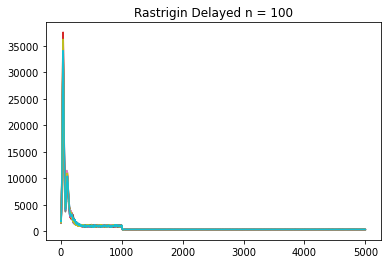

{'beta_1': 0.8423512899795214, 'beta_2': 0.8000862226329357, 'learning_rate': 0.36674943416642886}


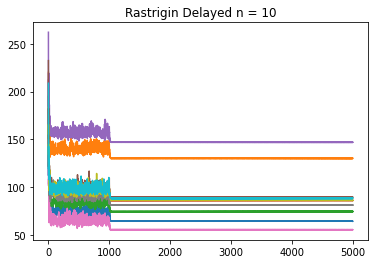

In [8]:
for i in rast_del_sym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-5.12,5.12,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals)
    plt.title("Rastrigin Delayed n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()

### The delayed nonsymmetric rastrigin tests

{'beta_1': 0.9045506639903279, 'beta_2': 0.8025798861541146, 'learning_rate': 0.945972047549867}


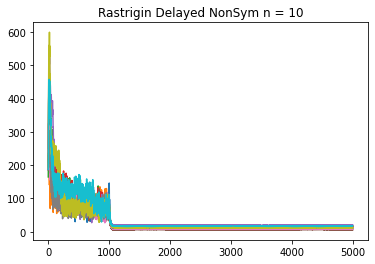

{'beta_1': 0.8597260216990753, 'beta_2': 0.9970720621820414, 'learning_rate': 0.6685415964990509}


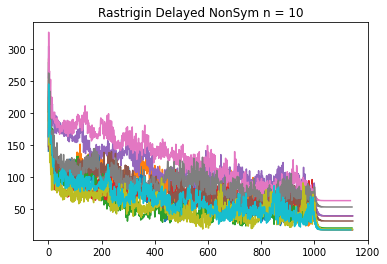

{'beta_1': 0.9856817297467448, 'beta_2': 0.8226164595252613, 'learning_rate': 1.093878759573935}


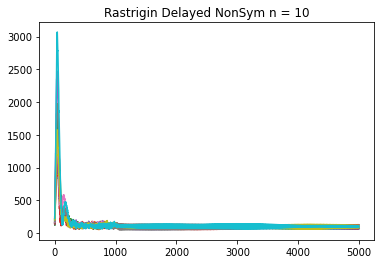

{'beta_1': 0.8923064415137802, 'beta_2': 0.8611579342175518, 'learning_rate': 0.08283916922752367}


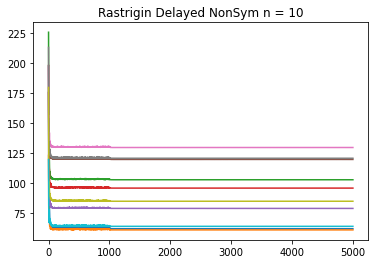

In [9]:
for i in rast_del_unsym:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-5.12,5.12,i.n)
        i.compute_time_series(use_delays=True, maxiter=maxiter, tol=tol, symmetric_delays=False, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals)
    plt.title("Rastrigin Delayed NonSym n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()

### The undelayed rastrigin tests

{'beta_1': 0.8492714854082505, 'beta_2': 0.8916227997008904, 'learning_rate': 0.5823561790819594}


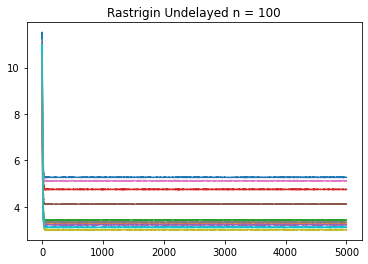

{'beta_1': 0.8196431174432115, 'beta_2': 0.9294896290010842, 'learning_rate': 0.0008305262212368947}


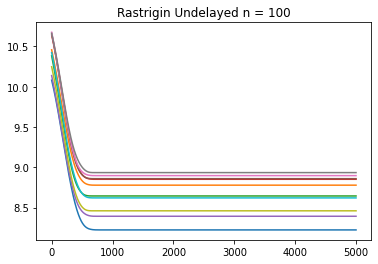

{'beta_1': 0.8588934569071991, 'beta_2': 0.9086942888819117, 'learning_rate': 0.6059571601677237}


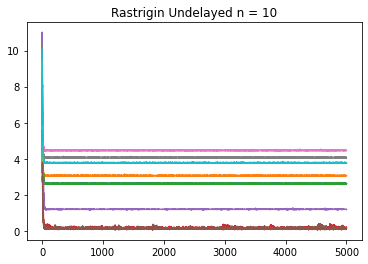

In [10]:
for i in rast_undel:
    print(i.Optimizer.params)
    plt.clf()
    for j in range(10):
        i.x_init = np.random.uniform(-5.12,5.12,i.n)
        i.compute_time_series(use_delays=False, maxiter=maxiter, tol=tol, symmetric_delays=True, random=True)
        x_vals = list()
        for k in range(len(i.time_series)):
            x_vals.append(i.loss_function(i.time_series[k,:]))
        i.delete_time_series()
        ys = np.arange(0, len(x_vals),1)
        plt.plot(ys, x_vals)
    plt.title("Rastrigin Undelayed n = {}".format(i.n))
    #plt.legend(loc='upper right')
    plt.show()

## Tests for single parameter optimization